# Reversible, Exothermic, Gas-Phase Reaction in a Catalytic Reactor
This is the ninth problem of the famous set of [Ten Problems in Chemical Engineering](https://www.polymath-software.com/ASEE/Tenprobs.pdf).  Here, the goal is to solve simultaneous ordinary differential equations with known initial conditions.

Jacob Albrecht, 2019

# Problem Setup

There is an elementary gas phase reaction in a jacketed reactor with a pressure drop:

$\require{mhchem}$
$$2A \ce{<=>} C$$

The relevant equations for the system are

$$F_{A0}\frac{dX}{dW} = -r_A'$$

where

$$-r_A' = k\left(C_A^2-\frac{C_C}{K_C}\right)$$

# Problem Tasks

a) Plot  the  conversion  (X),  reduced  pressure  (y)  and  temperature  (T  ×10-3)  along  the  reactor from  W = 0 kg up to W = 20 kg.

b) Around 16 kg of catalyst you will observe a “knee” in the conversion profile. Explain why this knee occurs and what parameters affect the knee.

c) Plot the concentration profiles for reactant A and product C from W = 0 kg up to W = 20 kg.

# Solutions
For integration, `scipy` is a good place to start

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
# define parameters
C_PA = 40
C_PC = 80
DeltaH_R = -40000
F_A0 = 5
Ta = 500
Ea = 41800
R = 8.314
alpha = 0.015
T0 = 450
k_450 = 0.5
C_A0 = 0.271
Kc_450 = 25000
UA = 0.8

# define ODE equations
def odefun(t,xTy):
    x, T, y = xTy # unpack conversion, temperature, and pressure
    k = k_450*np.exp(Ea/R*(1/T0-1/T))
    C_A = C_A0*(T0/T)*y/(1-0.5*x) * (1-x)
    C_C = C_A0*(T0/T)*y/(1-0.5*x) * 0.5*x
    Kc = Kc_450*np.exp(DeltaH_R/R*(1/T0-1/T))
    rA = -k*(C_A**2-C_C/Kc)
    return([-rA/F_A0,(UA*(Ta-T)+rA*DeltaH_R)/(C_PA*F_A0),-alpha*(1-0.5*x)*(T/T0)/(2*y)])

xTy0 = [0,T0,1]
Wspan = [0, 20]
W_eval = np.linspace(Wspan[0],Wspan[1],num=100)
sol = solve_ivp(odefun,Wspan,xTy0,t_eval=W_eval)

x, T, y = sol.y
W = sol.t

## solution to part a)

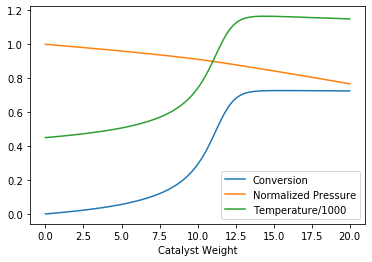

In [31]:
plt.plot(W,x,label='Conversion')
plt.plot(W,y,label= 'Normalized Pressure')
plt.plot(W,T/1000,label = 'Temperature/1000')
plt.xlabel('Catalyst Weight')

plt.legend();

## solution to part b)
The spike in conversion correlates with a spike in temperature indicating the reaction begins a thermal runaway at 10kg of catalyst.  To support his hypothesis, increase the heat transfer ($U_a$) of the reactor by 50x to ensure the temperature can't spike up.

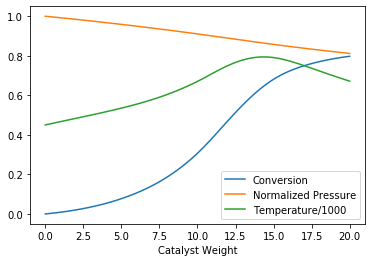

In [32]:
UA *= 50 # simple way of entering UA = UA * 50
sol_b = solve_ivp(odefun,Wspan,xTy0,t_eval=W_eval) # avoid overwriting 
x_b, T_b, y_b = sol_b.y
W_b = sol_b.t
plt.plot(W_b,x_b,label='Conversion')
plt.plot(W_b,y_b,label= 'Normalized Pressure')
plt.plot(W_b,T_b/1000,label = 'Temperature/1000')
plt.xlabel('Catalyst Weight')

plt.legend();

The higher heat transfer rate slows the temperature rise and smooths out the spike in conversion.

## solution to part c)
Recalculate $C_A$ and $C_C$ from the conversion, temperature, and pressure data from the part a) solution again

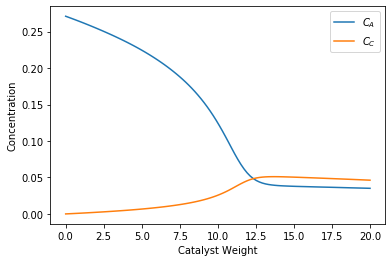

In [33]:
C_A = C_A0*(T0/T)*y/(1-0.5*x) * (1-x)
C_C = C_A0*(T0/T)*y/(1-0.5*x) * 0.5*x
plt.plot(W,C_A,label = '$C_A$')
plt.plot(W,C_C, label = '$C_C$')
plt.xlabel('Catalyst Weight')
plt.ylabel('Concentration')
plt.legend();

# Reference
“The Use of Mathematical Software packages in Chemical Engineering”, Michael B. Cutlip, John J. Hwalek, Eric H.
Nuttal, Mordechai Shacham, Workshop Material from Session 12, Chemical Engineering Summer School, Snowbird,
Utah, Aug., 1997.